In [1]:
!pip install --upgrade --no-cache-dir pip
!pip install --upgrade --no-cache-dir graphviz
!pip install --upgrade --no-cache-dir pyparsing
!pip install --upgrade --no-cache-dir pydot
!pip install --upgrade --no-cache-dir Wand
!brew install imagemagick

Requirement already up-to-date: pip in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: graphviz in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pydot in /usr/local/lib/python2.7/site-packages
Requirement already up-to-date: pyparsing in /usr/local/lib/python2.7/site-packages (from pydot)
Requirement already up-to-date: setuptools in /usr/local/lib/python2.7/site-packages (from pydot)
Requirement already up-to-date: Wand in /usr/local/lib/python2.7/site-packages


In [2]:
%reload_ext asymptote

import pydot
from wand.image import Image as WImage

Couldn't import dot_parser, loading of dot files will not be possible.


<a id="fig:weltkugel"></a>
**Abbildung: Schematische Darstellung der Weltkugel**

# Kartografie

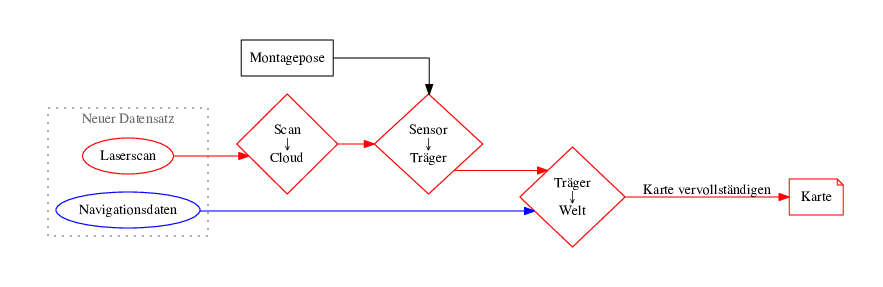

In [3]:
Laserscan = pydot.Node('Laserscan', shape='ellipse', color='red')
Karte = pydot.Node('Karte', shape='note', color='red')
MontagePose = pydot.Node('Montagepose', shape='rectangle')
NavDaten = pydot.Node('Navigationsdaten', shape='ellipse', color='blue')

ScanZuCloud = pydot.Node('"Scan\n&#8595;\nCloud"', shape='diamond', color='red')
SensorZuTraeger = pydot.Node('"Sensor\n&#8595;\nTräger"', shape='diamond', color='red')
TraegerZuWelt = pydot.Node('"Träger\n&#8595;\nWelt"', shape='diamond', color='red')

graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

inputs = pydot.Cluster('inputs', label='Neuer Datensatz', style='dotted', color='gray40', fontcolor='gray40')
inputs.add_node(Laserscan)
inputs.add_node(NavDaten)

graph.add_node(MontagePose)
graph.add_subgraph(inputs)
graph.add_node(Karte)
graph.add_node(ScanZuCloud)
graph.add_node(SensorZuTraeger)
graph.add_node(TraegerZuWelt)

graph.add_edge(pydot.Edge(Laserscan, ScanZuCloud, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloud, SensorZuTraeger, color='red'))
graph.add_edge(pydot.Edge(MontagePose, SensorZuTraeger))
graph.add_edge(pydot.Edge(SensorZuTraeger, TraegerZuWelt, color='red'))
graph.add_edge(pydot.Edge(NavDaten, TraegerZuWelt, color='blue'))
graph.add_edge(pydot.Edge(TraegerZuWelt, Karte, label='"Karte vervollständigen"', color='red'))

graph.write_pdf('Images/kartografie_der_laserscans.pdf')
img = WImage(filename='Images/kartografie_der_laserscans.pdf')
img

### Im Sensorkoordinatensystem

#### Ohne Bewegungskorrektur

In [4]:
ScanAP = pydot.Node(name='ScanAP', label='Laserscan', color='red')
ScanZuCloudAP = pydot.Node(name='ScanZuCloudAP', label='"Scan\n&#8595;\nCloud"', shape='diamond', group='g1', color='red')
NavDatenAP = pydot.Node(name='NavDatenAP', label='Navigationsdaten', color='blue')
ScanEP = pydot.Node(name='ScanEP', label='Laserscan', color='red')
ScanZuCloudEP = pydot.Node(name='ScanZuCloudEP', label='"Scan\n&#8595;\nCloud"', shape='diamond', group='g3', color='red')
NavDatenEP = pydot.Node(name='NavDatenEP', label='Navigationsdaten', color='blue')

Ausgangspose = pydot.Cluster('Ausgangspose', label='Ausgangspose (AP)', style='dotted', group='g1')
Ausgangspose.add_node(ScanAP)
Ausgangspose.add_node(NavDatenAP)

Endpose = pydot.Cluster('Endpose', label='Endpose (EP)', style='dotted', group='g3')
Endpose.add_node(ScanEP)
Endpose.add_node(NavDatenEP)

Bewegung = pydot.Cluster('Bewegungsänderung', label='Bewegungsänderung', rank='same', style='dashed', color='gray40', fontcolor='gray40')
Bewegung.add_subgraph(Ausgangspose)
Bewegung.add_subgraph(Endpose)

ICP  = pydot.Node('ICP', shape='doubleoctagon', color='red')
IMU  = pydot.Node('Bewegung', label='"NAV"', shape='doubleoctagon', color='blue')
Abgleich  = pydot.Node('Differenz', shape='doubleoctagon')
MontagePose = pydot.Node('Montagepose', shape='rectangle')

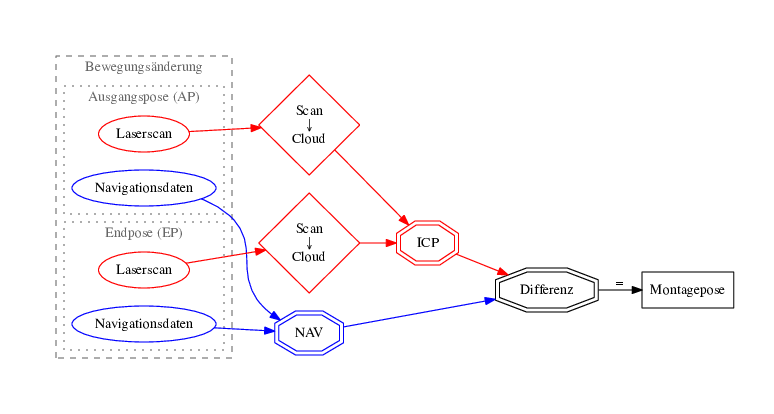

In [5]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

SensorBezugssystem = pydot.Cluster('SensorBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
SensorBezugssystem.add_subgraph(Bewegung)
SensorBezugssystem.add_node(ScanZuCloudAP)
SensorBezugssystem.add_node(ScanZuCloudEP)
SensorBezugssystem.add_node(IMU)

SensorBezugssystem.add_edge(pydot.Edge(ScanAP, ScanZuCloudAP, color='red'))
SensorBezugssystem.add_edge(pydot.Edge(ScanEP, ScanZuCloudEP, color='red'))
SensorBezugssystem.add_edge(pydot.Edge(NavDatenAP, IMU, color='blue'))
SensorBezugssystem.add_edge(pydot.Edge(NavDatenEP, IMU, color='blue'))

graph.add_subgraph(SensorBezugssystem)
graph.add_node(MontagePose)
graph.add_node(ICP)
graph.add_node(Abgleich)

graph.add_edge(pydot.Edge(ScanZuCloudAP, ICP, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloudEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, Abgleich, color='red'))
graph.add_edge(pydot.Edge(IMU, Abgleich, color='blue'))

graph.add_edge(pydot.Edge(Abgleich, MontagePose, label='='))

graph.write_pdf('Images/kalibrierungImSC.pdf')
img = WImage(filename='Images/kalibrierungImSC.pdf')
img

#### Mit Bewegungskorrektur

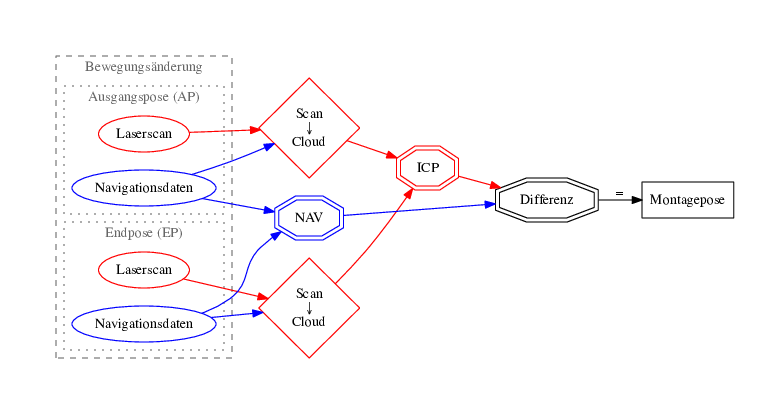

In [6]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

graph.add_subgraph(SensorBezugssystem)
graph.add_node(MontagePose)
graph.add_node(ICP)
graph.add_node(IMU)
graph.add_node(Abgleich)

graph.add_edge(pydot.Edge(ScanZuCloudAP, ICP, color='red'))
graph.add_edge(pydot.Edge(ScanZuCloudEP, ICP, color='red'))
graph.add_edge(pydot.Edge(NavDatenAP, ScanZuCloudAP, color='blue'))
graph.add_edge(pydot.Edge(NavDatenEP, ScanZuCloudEP, color='blue'))

graph.add_edge(pydot.Edge(ICP, Abgleich, color='red'))
graph.add_edge(pydot.Edge(IMU, Abgleich, color='blue'))

graph.add_edge(pydot.Edge(Abgleich, MontagePose, label='='))

graph.write_pdf('Images/kalibrierungImSCmitKorr.pdf')
img = WImage(filename='Images/kalibrierungImSCmitKorr.pdf')
img

### Im Weltkoordinatensystem

#### Ohne Bewegungskorrektur

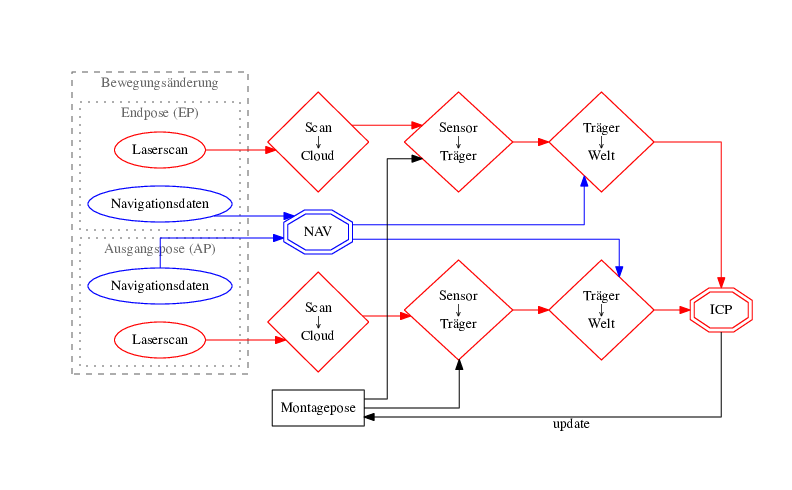

In [7]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

SensorZuTraegerAP = pydot.Node(name='SensorZuTraegerAP', label='"Sensor\n&#8595;\nTräger"', shape='diamond', group='g3', color='red')
SensorZuTraegerEP = pydot.Node(name='SensorZuTraegerEP', label='"Sensor\n&#8595;\nTräger"', shape='diamond', group='g3', color='red')

TraegerBezugssystem = pydot.Cluster('TraegerBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
TraegerBezugssystem.add_subgraph(SensorBezugssystem)
TraegerBezugssystem.add_node(SensorZuTraegerAP)
TraegerBezugssystem.add_node(SensorZuTraegerEP)
TraegerBezugssystem.add_node(MontagePose)

TraegerBezugssystem.add_edge(pydot.Edge(MontagePose, SensorZuTraegerAP))
TraegerBezugssystem.add_edge(pydot.Edge(MontagePose, SensorZuTraegerEP))
TraegerBezugssystem.add_edge(pydot.Edge(ScanZuCloudAP, SensorZuTraegerAP, color='red'))
TraegerBezugssystem.add_edge(pydot.Edge(ScanZuCloudEP, SensorZuTraegerEP, color='red'))

TraegerZuWeltAP = pydot.Node(name='TraegerZuWeltAP', label='"Träger\n&#8595;\nWelt"', shape='diamond', group='g3', color='red')
TraegerZuWeltEP = pydot.Node(name='TraegerZuWeltEP', label='"Träger\n&#8595;\nWelt"', shape='diamond', group='g3', color='red')

WeltBezugssystem = pydot.Cluster('TraegerBezugssystem', label='', rank='same', style='invis', color='gray40', fontcolor='gray40')
WeltBezugssystem.add_subgraph(TraegerBezugssystem)
WeltBezugssystem.add_node(TraegerZuWeltAP)
WeltBezugssystem.add_node(TraegerZuWeltEP)
WeltBezugssystem.add_node(IMU)

WeltBezugssystem.add_edge(pydot.Edge(IMU, TraegerZuWeltAP, color='blue'))
WeltBezugssystem.add_edge(pydot.Edge(IMU, TraegerZuWeltEP, color='blue'))
WeltBezugssystem.add_edge(pydot.Edge(SensorZuTraegerAP, TraegerZuWeltAP, color='red'))
WeltBezugssystem.add_edge(pydot.Edge(SensorZuTraegerEP, TraegerZuWeltEP, color='red'))

graph.add_subgraph(WeltBezugssystem)
graph.add_node(ICP)

graph.add_edge(pydot.Edge(TraegerZuWeltAP, ICP, color='red'))
graph.add_edge(pydot.Edge(TraegerZuWeltEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, MontagePose, xlabel='\ update'))

graph.write_pdf('Images/kalibrierungImWC.pdf')
img = WImage(filename='Images/kalibrierungImWC.pdf')
img

#### Mit Bewegungskorrektur

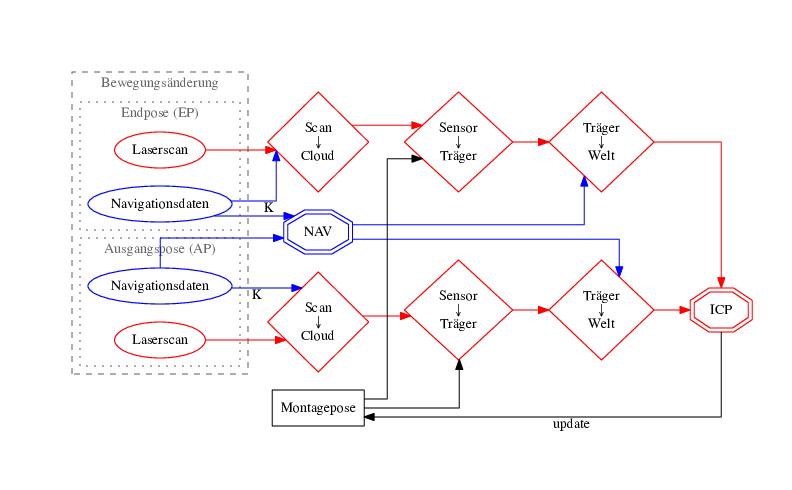

In [8]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR', splines='ortho')

graph.add_subgraph(WeltBezugssystem)
graph.add_node(ICP)

graph.add_edge(pydot.Edge(NavDatenAP, ScanZuCloudAP, color='blue', xlabel='K'))
graph.add_edge(pydot.Edge(NavDatenEP, ScanZuCloudEP, color='blue', xlabel='K'))

graph.add_edge(pydot.Edge(TraegerZuWeltAP, ICP, color='red'))
graph.add_edge(pydot.Edge(TraegerZuWeltEP, ICP, color='red'))
graph.add_edge(pydot.Edge(ICP, MontagePose, xlabel='\ update'))

graph.write_pdf('Images/kalibrierungImWCmitKorr.pdf')
img = WImage(filename='Images/kalibrierungImWCmitKorr.pdf')
img